# PART 2.0 imports and method definitions

In [53]:
%run grid
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
## Grid parameters
# Top left corner of the area
MAP_LAT = 46.5
MAP_LON = 6.55

# Total area size
MAP_SIZE_LAT = 0.07
MAP_SIZE_LON = 0.10

# Number of cells
CELL_NUM_LAT = 10
CELL_NUM_LON = 10

# Grid lines
GRID_LAT_POINTS = [MAP_LAT + i * (MAP_SIZE_LAT / CELL_NUM_LAT)
                   for i in range(1, CELL_NUM_LAT + 1)]
GRID_LON_POINTS = [MAP_LON + i * (MAP_SIZE_LON / CELL_NUM_LON)
                   for i in range(1, CELL_NUM_LON + 1)]

In [67]:
#import queries and separate timestamp to day and time, where day is number from 0 to 6 with 0 being sunday, 1 monday...

queries = pd.read_csv("queries.csv", encoding = "utf-8")

time_of_day = queries['timestamp'] % 24
day_of_week = (queries['timestamp'] // 24 + 1) % 7 
queries['time_of_day'] = time_of_day
queries['day_of_week'] = day_of_week

In [141]:
pois = pd.read_csv("pois.csv", encoding = "utf-8")

#add number for type of poi type query for ease with colors and labels
query_types = set(pois['poi_type'].values)
types = {}
j = 0
for i in query_types:
    types[i] = j
    j += 1

print(types)


queries['query_type_num'] = queries.apply (lambda row: types.get(row['poi_type_query']), axis=1)
pois['poi_type_num'] = pois.apply (lambda row: types.get(row['poi_type']), axis=1)

{'laboratory': 0, 'club': 1, 'gym': 2, 'villa': 3, 'company': 4, 'appartment_block': 5, 'dojo': 6, 'supermarket': 7, 'cafeteria': 8, 'bar': 9, 'office': 10, 'restaurant': 11}


In [142]:
pois

,poi_id,cell_id,poi_type,lat,lon,poi_type_num
0,307,1,bar,46.504486,6.559631,9
1,331,1,bar,46.500259,6.554721,9
2,578,1,supermarket,46.506017,6.551165,7
3,897,1,club,46.504494,6.553889,1
4,972,1,supermarket,46.502984,6.550519,7
...,...,...,...,...,...,...
1055,372,100,restaurant,46.563852,6.648454,11
1056,649,100,bar,46.564047,6.640250,9
1057,730,100,gym,46.565961,6.642228,2
1058,828,100,club,46.569177,6.642401,1


In [70]:
queries

,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num
0,34.101.177.245,46.532942,6.591174,14.912448,cafeteria,14.912448,1.0,8
1,34.101.177.245,46.532942,6.591174,14.912448,restaurant,14.912448,1.0,11
2,34.101.177.245,46.550342,6.602852,18.024657,restaurant,18.024657,1.0,11
3,34.101.177.245,46.550342,6.602852,18.024657,cafeteria,18.024657,1.0,8
4,34.101.177.245,46.532942,6.591174,36.334539,cafeteria,12.334539,2.0,8
...,...,...,...,...,...,...,...,...
20438,11.173.13.2,46.524410,6.625246,449.159554,supermarket,17.159554,5.0,7
20439,11.173.13.2,46.527363,6.628705,453.426750,supermarket,21.426750,5.0,7
20440,11.173.13.2,46.527363,6.628705,453.426750,gym,21.426750,5.0,2
20441,11.173.13.2,46.524410,6.625246,464.420041,supermarket,8.420041,6.0,7


In [71]:
#when a query is done, poi_type_query indicates what he searched for, but in pois we have types of locations for all coords
# -> append to query from pois the type of location someone is while searching
poitypes = pois[['poi_type', 'lat', 'lon', 'poi_type_num']].copy()
full_queries = queries.merge(poitypes, on=['lat', 'lon'])

print(full_queries.isnull().values.any()) 
#no values are nan thus all points from where the searches occured, have types in db
#-> we know exactly what type of building the user is in
full_queries

False


,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num,poi_type,poi_type_num
0,34.101.177.245,46.532942,6.591174,14.912448,cafeteria,14.912448,1.0,8,company,4
1,34.101.177.245,46.532942,6.591174,14.912448,restaurant,14.912448,1.0,11,company,4
2,34.101.177.245,46.532942,6.591174,36.334539,cafeteria,12.334539,2.0,8,company,4
3,34.101.177.245,46.532942,6.591174,36.334539,restaurant,12.334539,2.0,11,company,4
4,34.101.177.245,46.532942,6.591174,59.359388,cafeteria,11.359388,3.0,8,company,4
...,...,...,...,...,...,...,...,...,...,...
20438,88.32.125.209,46.557406,6.636327,92.292035,restaurant,20.292035,4.0,11,dojo,6
20439,88.32.125.209,46.557406,6.636327,454.560347,dojo,22.560347,5.0,6,dojo,6
20440,88.32.125.209,46.557406,6.636327,454.560347,supermarket,22.560347,5.0,7,dojo,6
20441,11.173.13.2,46.525482,6.571666,296.602028,supermarket,8.602028,6.0,7,dojo,6


In [79]:
#set lon lat coords to image coordinates

def coord_trans(lon, lat):
    scale_x = 580 / MAP_SIZE_LON
    scale_y = 589 / MAP_SIZE_LAT

    x = (lon - MAP_LON) * scale_x
    y = (MAP_LAT - lat) * scale_y + 589
    return x, y

x = []
y = []
for lon, lat in zip(pois.lon, pois.lat):
    a, b = coord_trans(lon, lat)
    x.append(a)
    y.append(b)
    
pois['x'] = x
pois['y'] = y

x = []
y = []
for lon, lat in zip(queries.lon, queries.lat):
    a, b = coord_trans(lon, lat)
    x.append(a)
    y.append(b)
queries['x'] = x
queries['y'] = y

x = []
y = []
for lon, lat in zip(full_queries.lon, full_queries.lat):
    a, b = coord_trans(lon, lat)
    x.append(a)
    y.append(b)
full_queries['x'] = x
full_queries['y'] = y

In [73]:
#set grid lines coords to image coords
gridx = [0]
gridy = [589]
for lon, lat in zip(GRID_LON_POINTS, GRID_LAT_POINTS):
    a, b = coord_trans(lon, lat)
    gridx.append(a)
    gridy.append(b)

In [116]:
#grid is plotted with dashed lines, plot square plots the square the query is in with full lines 
#not rly useful, but nice to have
def plot_square(ax, lat, lon):
    
    y_id, xid = location_to_cell_id(lat, lon)
    ax.plot([gridx[xid], gridx[xid]], [gridy[y_id], gridy[y_id+1]], c = 'black')
    ax.plot([gridx[xid+1], gridx[xid+1]], [gridy[y_id], gridy[y_id+1]], c = 'black')
    ax.plot([gridx[xid], gridx[xid+1]], [gridy[y_id+1], gridy[y_id+1]], c = 'black')
    ax.plot([gridx[xid], gridx[xid+1]], [gridy[y_id], gridy[y_id]], c = 'black')    

In [229]:
#imports map image and plots grid
def make_map():
    my_map = plt.imread('big_grey.png')
    fig, ax = plt.subplots(figsize = (20,20))
    ax.imshow(my_map, alpha = 1)
    imx,imy, _ = (my_map).shape
    for x in gridx:
        ax.plot([x, x], [0, imy+8], '--', c = 'grey')
    for y in gridy:
        ax.plot([0, imx-9], [y, y], '--', c = 'grey')
    return fig, ax
#plots the points from dataframe on image, already added some filters for day in week and minmax time
def plot_query(ax, df, day = 10, timemax = 25, timemin = 25, color = 'poi_type_num'):
    if color == 'query_type_num':
        s = set(df['poi_type_query'].values)
    else:
        s = set(df['poi_type'].values)
    t = {}
    for i in s:
        t[i] = types.get(i)
    print(t)
    
    if day != 10:
        df = df.loc[df['day_of_week'] == day]
    if timemax != 25:
        df = df.loc[df['time_of_day'] <= timemax]
    if timemin != 25:
        df = df.loc[df['time_of_day'] >= timemin]
    for lon, lat in zip(df.lon, df.lat):
        plot_square(ax, lat, lon)
    scatter = ax.scatter(df['x'], df['y'], s = 100, c=df[color], cmap = 'nipy_spectral')
    legend1 = ax.legend(*(scatter.legend_elements()[0], t), title=color)
    ax.add_artist(legend1)
    return ax

{'gym': 2, 'villa': 3, 'dojo': 6, 'supermarket': 7, 'office': 10, 'restaurant': 11}


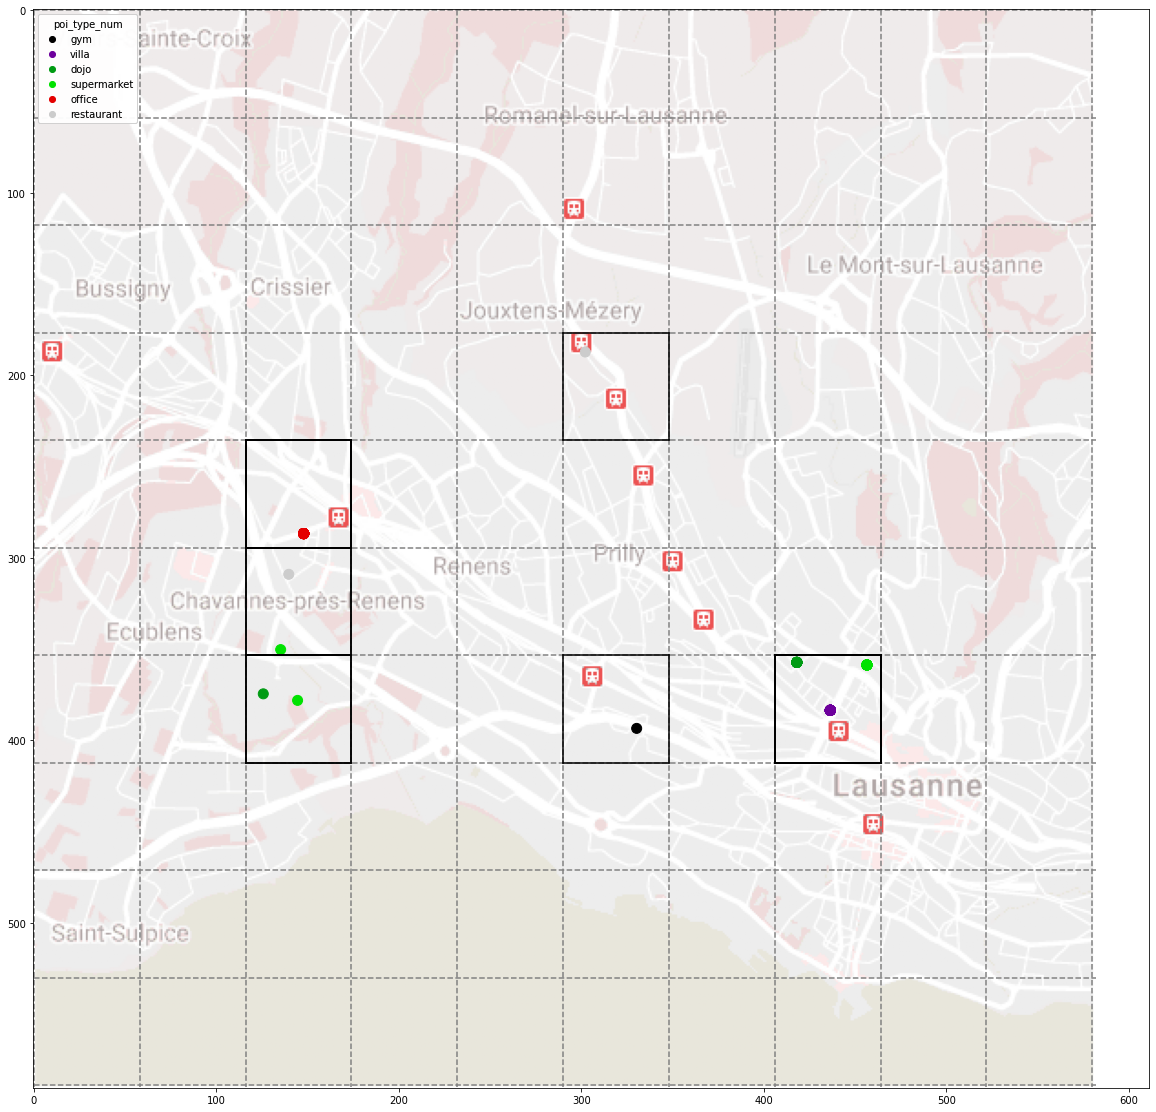

In [231]:
fig, ax = make_map()
df = full_queries.loc[full_queries['ip_address'] == "11.173.13.2"]
ax = plot_query(ax, df)


# PART 2.1 trying to find where you live

In [232]:
blocks = full_queries.loc[full_queries['poi_type'] == "appartment_block"]
print(len(set(blocks['ip_address'].values)))
blocks

99


,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num,poi_type,poi_type_num,x,y
1197,60.109.165.215,46.533022,6.585648,19.324706,gym,19.324706,1.0,2,appartment_block,5,206.756055,311.147039
1198,60.109.165.215,46.533022,6.585648,19.324706,bar,19.324706,1.0,9,appartment_block,5,206.756055,311.147039
1199,60.109.165.215,46.533022,6.585648,44.458384,club,20.458384,2.0,1,appartment_block,5,206.756055,311.147039
1200,60.109.165.215,46.533022,6.585648,44.458384,restaurant,20.458384,2.0,11,appartment_block,5,206.756055,311.147039
1201,60.109.165.215,46.533022,6.585648,65.454704,club,17.454704,3.0,1,appartment_block,5,206.756055,311.147039
...,...,...,...,...,...,...,...,...,...,...,...,...
20424,88.32.125.209,46.562818,6.635771,426.095600,club,18.095600,4.0,1,appartment_block,5,497.470311,60.434311
20425,88.32.125.209,46.562818,6.635771,426.095600,supermarket,18.095600,4.0,7,appartment_block,5,497.470311,60.434311
20426,88.32.125.209,46.562818,6.635771,450.004837,restaurant,18.004837,5.0,11,appartment_block,5,497.470311,60.434311
20427,88.32.125.209,46.562818,6.635771,450.004837,dojo,18.004837,5.0,6,appartment_block,5,497.470311,60.434311


99 unique ip_adressses (unique users) have searched atleast once from an appartment_block

{'appartment_block': 5}


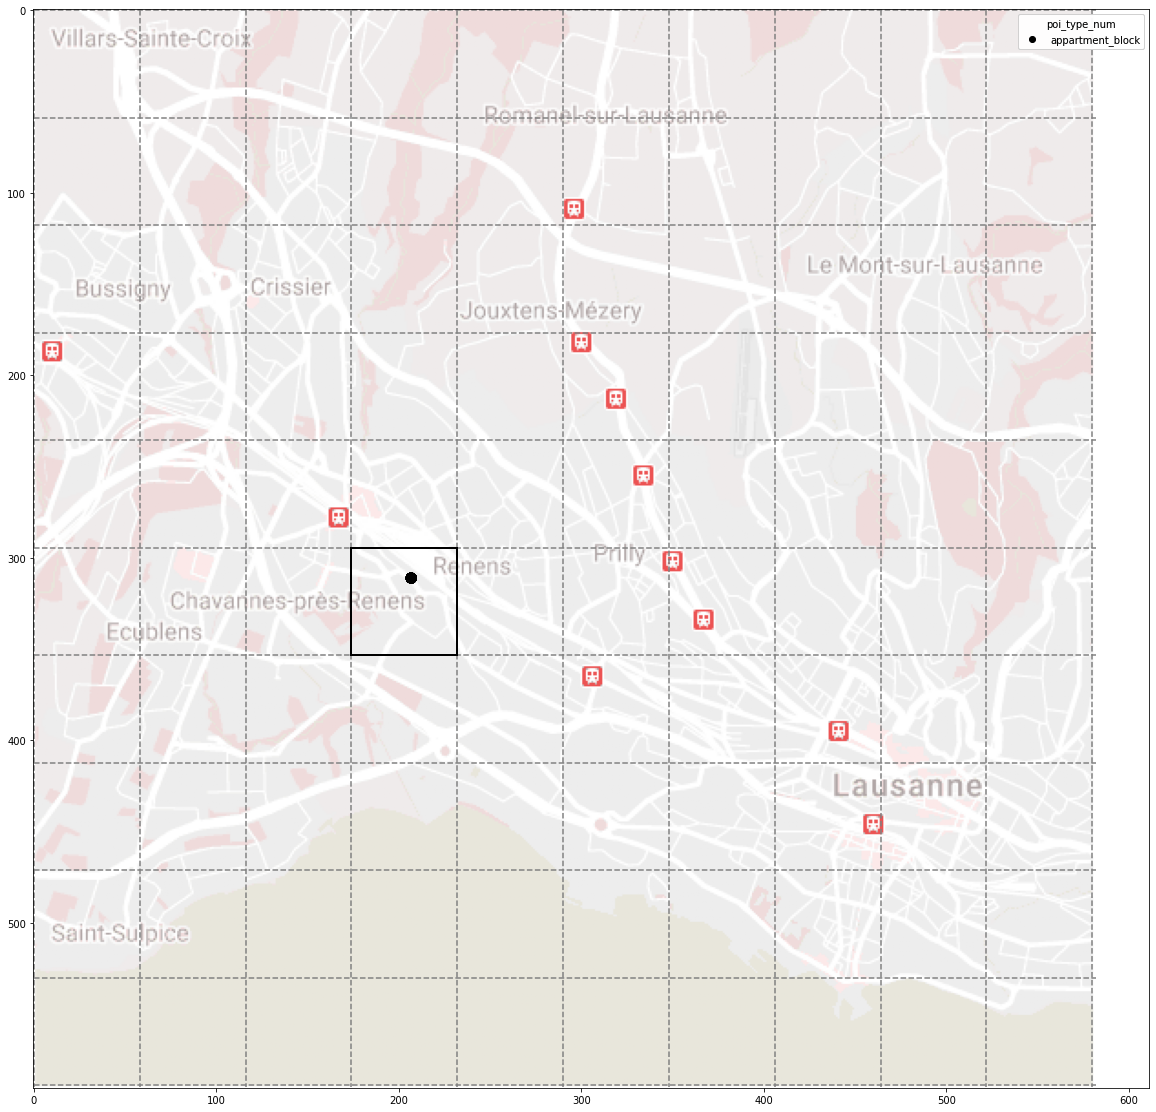

In [233]:
fig, ax = make_map()
df = blocks.loc[blocks['ip_address'] == '60.109.165.215']
#people are at home in the morning or in the evening (otherwise they might be at a friends, family home)
ax = plot_query(ax, df)

In [234]:
df
#very interesting person! only searches from 1 single home, searches for bars/clubs every day. 
# In the evening on workdays and morning on weekends

,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num,poi_type,poi_type_num,x,y
1197,60.109.165.215,46.533022,6.585648,19.324706,gym,19.324706,1.0,2,appartment_block,5,206.756055,311.147039
1198,60.109.165.215,46.533022,6.585648,19.324706,bar,19.324706,1.0,9,appartment_block,5,206.756055,311.147039
1199,60.109.165.215,46.533022,6.585648,44.458384,club,20.458384,2.0,1,appartment_block,5,206.756055,311.147039
1200,60.109.165.215,46.533022,6.585648,44.458384,restaurant,20.458384,2.0,11,appartment_block,5,206.756055,311.147039
1201,60.109.165.215,46.533022,6.585648,65.454704,club,17.454704,3.0,1,appartment_block,5,206.756055,311.147039
1202,60.109.165.215,46.533022,6.585648,65.454704,restaurant,17.454704,3.0,11,appartment_block,5,206.756055,311.147039
1203,60.109.165.215,46.533022,6.585648,89.182454,restaurant,17.182454,4.0,11,appartment_block,5,206.756055,311.147039
1204,60.109.165.215,46.533022,6.585648,89.182454,bar,17.182454,4.0,9,appartment_block,5,206.756055,311.147039
1205,60.109.165.215,46.533022,6.585648,117.214349,bar,21.214349,5.0,9,appartment_block,5,206.756055,311.147039
1206,60.109.165.215,46.533022,6.585648,117.214349,gym,21.214349,5.0,2,appartment_block,5,206.756055,311.147039


{'gym': 2, 'company': 4, 'appartment_block': 5, 'bar': 9, 'restaurant': 11}


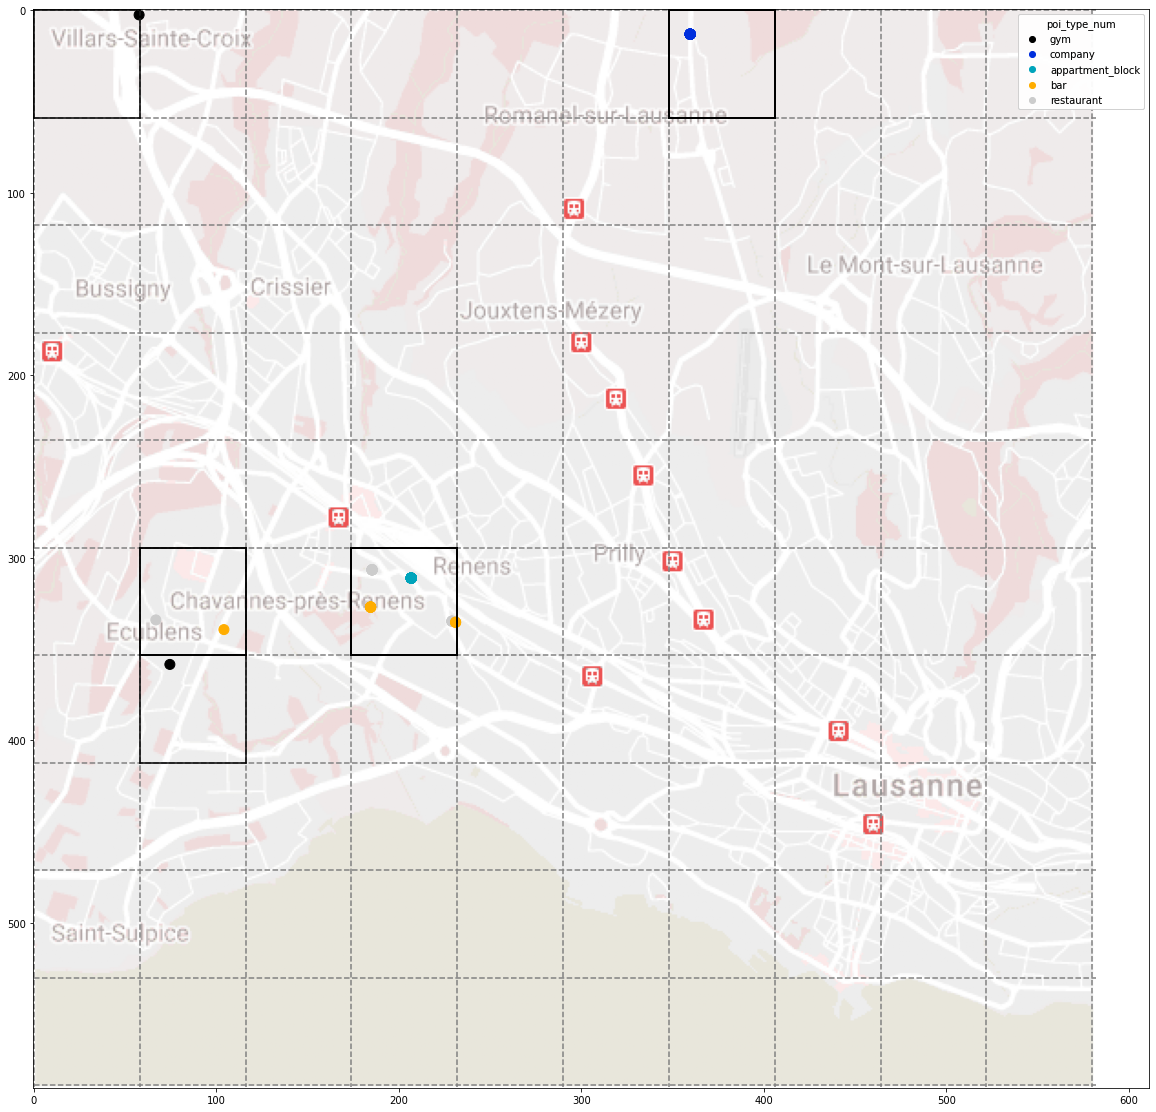

In [235]:
inter_person = full_queries.loc[full_queries['ip_address'] == '60.109.165.215']
#where was he
fig, ax = make_map()
ax = plot_query(ax, inter_person, color='poi_type_num')

{'gym': 2, 'club': 1, 'cafeteria': 8, 'bar': 9, 'restaurant': 11}


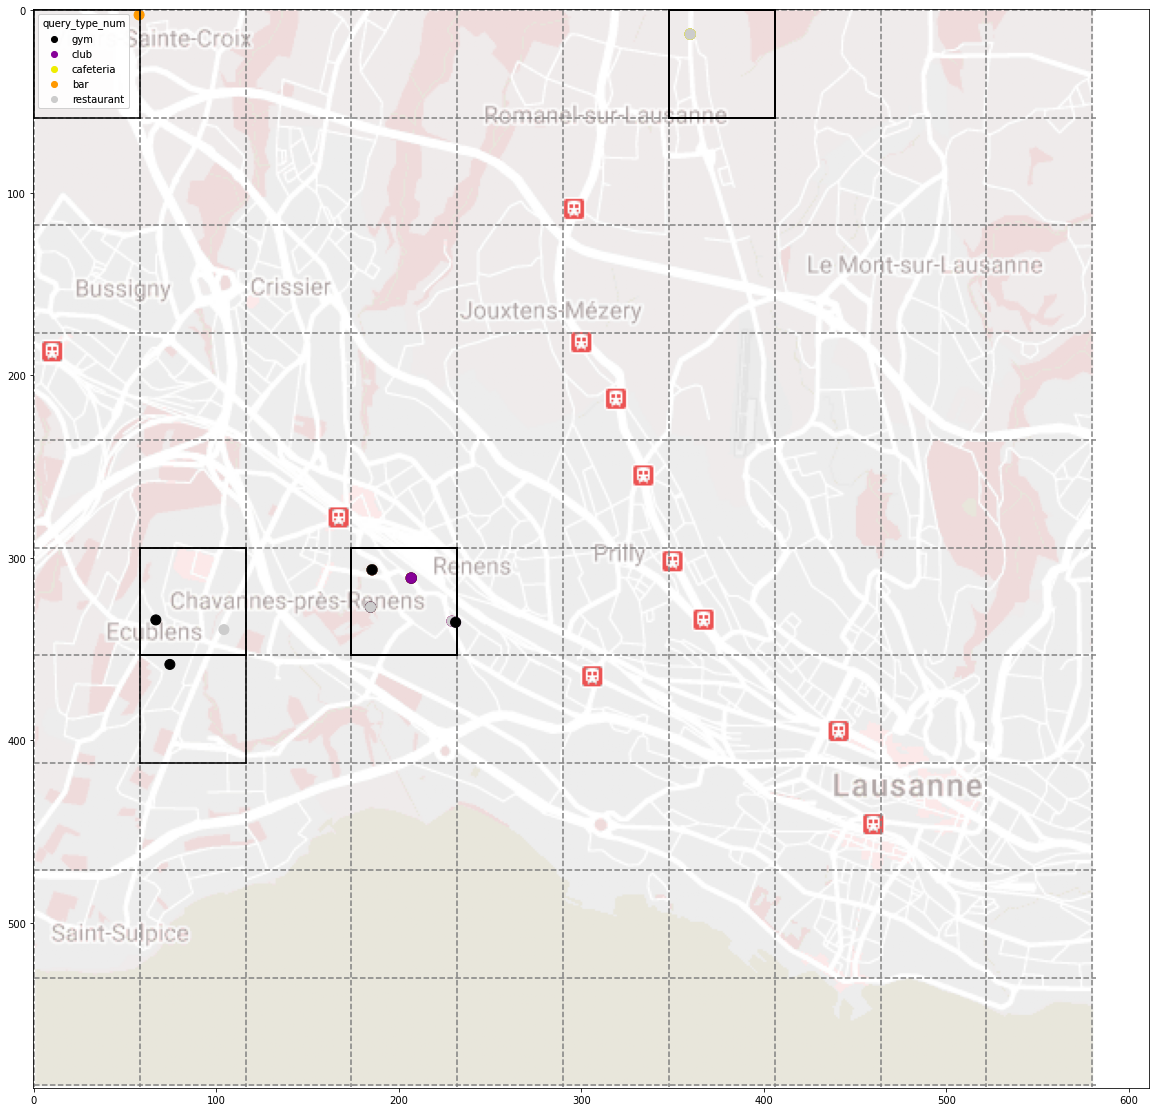

In [236]:
fig, ax = make_map()
#what he searched for
ax = plot_query(ax, inter_person, color='query_type_num')

Using both graphs, we can see that, the person lives next to renens train station. Works in a company in Remanel-sur-Lausanne, where he usually goes to eat lunch in a nearby restaurant/cafeteria. 

The person searched for a gym 5 times around 21h from a restaurant or home and the 6th time on a saturday morning went to the proposed gym in Sainte-Croix (quite far from where he lives)

Around two weeks later he changed gyms to a closer one at Ecublens

In [257]:
inter_person.loc[inter_person['poi_type']=='gym']

,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num,poi_type,poi_type_num,x,y
1287,60.109.165.215,46.527398,6.562839,128.747329,club,8.747329,6.0,1,gym,2,74.467970,358.468011
1333,60.109.165.215,46.569704,6.559932,464.504041,bar,8.504041,6.0,9,gym,2,57.607159,2.491720


In [258]:
g = inter_person.loc[inter_person['poi_type_query']=='gym']
g.loc[g['timestamp'] < 129]

,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num,poi_type,poi_type_num,x,y
1197,60.109.165.215,46.533022,6.585648,19.324706,gym,19.324706,1.0,2,appartment_block,5,206.756055,311.147039
1206,60.109.165.215,46.533022,6.585648,117.214349,gym,21.214349,5.0,2,appartment_block,5,206.756055,311.147039
1207,60.109.165.215,46.533022,6.585648,128.747329,gym,8.747329,6.0,2,appartment_block,5,206.756055,311.147039
1235,60.109.165.215,46.531132,6.581805,116.246192,gym,20.246192,5.0,2,bar,9,184.468839,327.046339
1259,60.109.165.215,46.533561,6.581944,68.795142,gym,20.795142,3.0,2,restaurant,11,185.273577,306.609467
1262,60.109.165.215,46.533561,6.581944,92.138208,gym,20.138208,4.0,2,restaurant,11,185.273577,306.609467


In [262]:
g = inter_person.loc[inter_person['poi_type_query']=='gym']
g.loc[g['timestamp'] > 129]

,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num,poi_type,poi_type_num,x,y
1213,60.109.165.215,46.533022,6.585648,234.774176,gym,18.774176,3.0,2,appartment_block,5,206.756055,311.147039
1215,60.109.165.215,46.533022,6.585648,259.781458,gym,19.781458,4.0,2,appartment_block,5,206.756055,311.147039
1218,60.109.165.215,46.533022,6.585648,282.938048,gym,18.938048,5.0,2,appartment_block,5,206.756055,311.147039
1227,60.109.165.215,46.533022,6.585648,427.881572,gym,19.881572,4.0,2,appartment_block,5,206.756055,311.147039
1229,60.109.165.215,46.533022,6.585648,449.817011,gym,17.817011,5.0,2,appartment_block,5,206.756055,311.147039
1231,60.109.165.215,46.533022,6.585648,464.504041,gym,8.504041,6.0,2,appartment_block,5,206.756055,311.147039
1241,60.109.165.215,46.531132,6.581805,296.321006,gym,8.321006,6.0,2,bar,9,184.468839,327.046339
1289,60.109.165.215,46.530215,6.589490,211.226449,gym,19.226449,2.0,2,restaurant,11,229.040600,334.766100
1290,60.109.165.215,46.530215,6.589490,427.675338,gym,19.675338,4.0,2,restaurant,11,229.040600,334.766100
1316,60.109.165.215,46.530140,6.589840,321.357289,gym,9.357289,0.0,2,bar,9,231.070499,335.389884


The person sometimes goes out to bars from where he searches for other bars/clubs or restaurants to do some "bar hopping"



In [265]:
inter_person.loc[inter_person['poi_type'] == 'bar']

,ip_address,lat,lon,timestamp,poi_type_query,time_of_day,day_of_week,query_type_num,poi_type,poi_type_num,x,y
1232,60.109.165.215,46.531132,6.581805,20.590331,bar,20.590331,1.0,9,bar,9,184.468839,327.046339
1233,60.109.165.215,46.531132,6.581805,20.590331,club,20.590331,1.0,1,bar,9,184.468839,327.046339
1234,60.109.165.215,46.531132,6.581805,116.246192,restaurant,20.246192,5.0,11,bar,9,184.468839,327.046339
1235,60.109.165.215,46.531132,6.581805,116.246192,gym,20.246192,5.0,2,bar,9,184.468839,327.046339
1236,60.109.165.215,46.531132,6.581805,153.464024,restaurant,9.464024,0.0,11,bar,9,184.468839,327.046339
1237,60.109.165.215,46.531132,6.581805,189.412753,restaurant,21.412753,1.0,11,bar,9,184.468839,327.046339
1238,60.109.165.215,46.531132,6.581805,189.412753,club,21.412753,1.0,1,bar,9,184.468839,327.046339
1239,60.109.165.215,46.531132,6.581805,239.029585,bar,23.029585,3.0,9,bar,9,184.468839,327.046339
1240,60.109.165.215,46.531132,6.581805,239.029585,restaurant,23.029585,3.0,11,bar,9,184.468839,327.046339
1241,60.109.165.215,46.531132,6.581805,296.321006,gym,8.321006,6.0,2,bar,9,184.468839,327.046339
